<a href="https://colab.research.google.com/github/vishwvir-singh/DeepLearningForNLP/blob/main/rnn_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.layers import SimpleRNN # new! 
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt

In [2]:
# output directory name:
output_dir = '/content/sentiment_classifier/rnn'

# training:
epochs = 16 # way more!
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN layer architecture:
n_rnn = 256 
drop_rnn = 0.2

# dense layer architecture: 
# n_dense = 256
# dropout = 0.2

In [3]:
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('Dirs created successfully !!!')

os.chdir(output_dir)
print('Path --> {} and ListDirs ---> {} '.format(os.getcwd(), os.listdir()))


Dirs created successfully !!!
Path --> /content/sentiment_classifier/rnn and ListDirs ---> [] 


In [4]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [6]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) # typically don't see top dense layer in NLP like in 
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [9]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [10]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/16
196/196 [==============================] - 27s 121ms/step - loss: 0.7069 - accuracy: 0.4983 - val_loss: 0.6930 - val_accuracy: 0.5062
Epoch 2/16
196/196 [==============================] - 24s 120ms/step - loss: 0.6946 - accuracy: 0.5093 - val_loss: 0.7052 - val_accuracy: 0.5222
Epoch 3/16
196/196 [==============================] - 23s 120ms/step - loss: 0.6912 - accuracy: 0.5289 - val_loss: 0.6832 - val_accuracy: 0.5418
Epoch 4/16
196/196 [==============================] - 23s 118ms/step - loss: 0.6754 - accuracy: 0.5742 - val_loss: 0.6701 - val_accuracy: 0.5684
Epoch 5/16
196/196 [==============================] - 23s 119ms/step - loss: 0.6096 - accuracy: 0.6644 - val_loss: 0.6461 - val_accuracy: 0.6257
Epoch 6/16
196/196 [==============================] - 23s 120ms/step - loss: 0.5604 - accuracy: 0.7390 - val_loss: 0.6736 - val_accuracy: 0.6124
Epoch 7/16
196/196 [==============================] - 23s 119ms/step - loss: 0.6536 - accuracy: 0.6323 - val_loss: 0.6395 - val_ac

In [25]:
model.load_weights(output_dir+"/weights.11.hdf5")

In [26]:
# y_hat = model.predict(y_valid)
y_hat = model.predict_proba(x_valid)
y_hat[:10]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.387238  ],
       [0.93485516],
       [0.15804139],
       [0.06662216],
       [0.90930307],
       [0.10875256],
       [0.19944538],
       [0.02900905],
       [0.8042135 ],
       [0.760539  ]], dtype=float32)

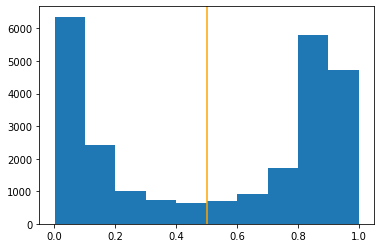

In [27]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [28]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'86.68'